In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Train_Data.csv')
df.head(5)

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"Great work, Zhesbe! I'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   text                     4999 non-null   object
 1   author                   4999 non-null   object
 2   controversiality         4999 non-null   int64 
 3   parent_text              4999 non-null   object
 4   parent_score             4999 non-null   int64 
 5   parent_votes             4999 non-null   int64 
 6   parent_author            4999 non-null   object
 7   parent_controversiality  4999 non-null   int64 
 8   Score                    4999 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 351.6+ KB


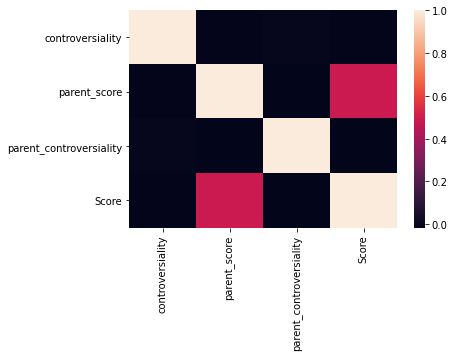

In [8]:
df.drop('parent_votes', axis= 1, inplace=True)
sns.heatmap(df.corr())

### Natural Language Processing

In [9]:
cols = ['text','author','parent_text','parent_author']

def lower_and_remove_punctuation(df,cols):
    for col in df[cols]:
        df[col] = df[col].str.lower()
        df[col] = df[col].str.strip()
    
    import string
    for col in df[cols]:
        df[col] = df[col].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
    return df
df = lower_and_remove_punctuation(df,cols)
df

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,whisper,0,-8
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,mrjellyneck,0,-7
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,ometzo,0,67
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,zhesbe,0,1348
...,...,...,...,...,...,...,...,...
4994,dying words of my father son one day a man wil...,karmamechanic,0,gather round drinking buddies its that time a...,540,willis77,0,234
4995,catering to everyone and their impossible simu...,schym,0,so basically sona players will get the authent...,560,sleeplessone,0,107
4996,rabblerabblerabblerabble,azurphax,0,everyone its forthewolfx,370,kinkytraficcone,0,193
4997,little known fact viola is not only a french w...,dcgutz,0,ending the comment train with voila,4,anderson0457,0,-8


In [11]:
#Remove punctuation marks
import string

for col in df[categorical_cols]:
    df[col] = df[col].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,whisper,0,-8
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,mrjellyneck,0,-7
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,ometzo,0,67
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,zhesbe,0,1348


In [11]:
#thos single function will manage to do tokenization,stopwords removal,lemmatization(tsl)
'''
parameters : df = dataframe
             cols = columns with text

'''
def tsl(df,cols):
    import nltk
    from nltk.tokenize import word_tokenize 
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    nltk.download('punkt')
    stopwords = nltk.corpus.stopwords.words('english')
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    lemmatize_function = lambda x: [lemmatizer.lemmatize(str(word)) for word in x.split()]
    
    for col in cols:
        new_col = col+'_tokens'
        df[new_col] = df[col].apply(word_tokenize)
        df[new_col] = df[new_col].apply(lambda x: ' '.join([w for w in x if w not in stopwords]))
        df[new_col] = df[new_col].apply(lemmatize_function)
        df[col]= df[new_col].apply(lambda x: ' '.join(x))
        df.drop(new_col, axis=1, inplace= True)
    return df

df1 = tsl(df,['text','parent_text'])

df1.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well work,calantus,0,quite unfair call hillary clinton cunt lack de...,245,whisper,0,-8
1,downmodded irrelevance isnt work,shadowrose,0,upmodded awesome kindness,32,b3mus3d,0,-16
2,supposed mean place people undoubtedly snake b...,nexusrush,0,hell golf course anything think bunch rich whi...,12,mrjellyneck,0,-7
3,thought everyone fucking delicious,r0nswans0n,0,nice try jennifer know know like baba ganoush,117,ometzo,0,67
4,great work zhesbe id give raise seem handled,reddums,0,hey bos come look,1933,zhesbe,0,1348


In [83]:
#normalization - lemmatizing
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatize_function = lambda x: [lemmatizer.lemmatize(str(word)) for word in x.split()]

for col in tokens_cols:
    df1[col] = df1[col].apply(lemmatize_function)
df1.head()
#not required

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score,text_tokens,parent_text_tokens
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,245,whisper,0,-8,"[must, retarded, thought, meant, con, lawl, oh...","[quite, unfair, call, hillary, clinton, cunt, ..."
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,32,b3mus3d,0,-16,"[downmodded, irrelevance, isnt, work]","[upmodded, awesome, kindness]"
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,12,mrjellyneck,0,-7,"[supposed, mean, place, people, undoubtedly, s...","[hell, golf, course, anything, think, bunch, r..."
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,117,ometzo,0,67,"[thought, everyone, fucking, delicious]","[nice, try, jennifer, know, know, like, baba, ..."
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,1933,zhesbe,0,1348,"[great, work, zhesbe, id, give, raise, seem, h...","[hey, bos, come, look]"


In [15]:
df['text']= df['text_tokens'].apply(lambda x: ' '.join(x))
df['parent_text']= df['parent_text_tokens'].apply(lambda x: ' '.join(x))
df.drop(['text_tokens', 'parent_text_tokens'], axis=1, inplace= True)

df.head()
#not required

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well work,calantus,0,quite unfair call hillary clinton cunt lack de...,245,whisper,0,-8
1,downmodded irrelevance isnt work,shadowrose,0,upmodded awesome kindness,32,b3mus3d,0,-16
2,supposed mean place people undoubtedly snake b...,nexusrush,0,hell golf course anything think bunch rich whi...,12,mrjellyneck,0,-7
3,thought everyone fucking delicious,r0nswans0n,0,nice try jennifer know know like baba ganoush,117,ometzo,0,67
4,great work zhesbe id give raise seem handled,reddums,0,hey bos come look,1933,zhesbe,0,1348


In [12]:
# Vectorize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
text = vectorizer.fit_transform(df['text']).toarray()
text = pd.DataFrame(text, columns=vectorizer.get_feature_names())

print(text.shape)

vectorizer1 = TfidfVectorizer(max_features=50,min_df=1,max_df=0.7)
text_tf_idf = vectorizer1.fit_transform(df['text']).toarray()
text_tf_idf = pd.DataFrame(text_tf_idf, columns=vectorizer1.get_feature_names())

text_tf_idf.shape

(4999, 13885)


(4999, 50)

In [34]:
#sns.heatmap(df1)

len(pd.unique(df1['parent_author']))

4448

In [35]:
numeric_cols = df[['controversiality', 'parent_score', 'parent_controversiality']]
x = pd.concat([text, numeric_cols], axis=1)
y = df['Score']

In [36]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42)

### Machine Learining Models

In [37]:
# Linear regressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

pred_y = lr.predict(x_val)

In [38]:
# Root mean squared error 
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred_y)))

Root Mean Squared Error is:  6303557775.931191


In [23]:
# XGB regressor
from xgboost import XGBRegressor

xgbReg = XGBRegressor(verbosity=0)
xgbReg.fit(x_train, y_train)

pred_y1 = xgbReg.predict(x_val)

# Root mean squared error 
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred_y1)))

In [25]:
# KNN 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter for n_neighbors
param_grid = {'n_neighbors': np.arange(1,30)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)
knn_cv.best_params_

{'n_neighbors': 29}

In [30]:
knn = KNeighborsRegressor(n_neighbors = 50)
knn.fit(x_train, y_train)

pred_y2 = knn.predict(x_val)

# Root mean squared error 
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred_y2)))

Root Mean Squared Error is:  141.41448794094612


In [32]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': np.arange(1,10), 'max_depth': np.arange(1, 10)}

RFRegressor = RandomForestRegressor()
RFRegressor_cv = GridSearchCV(RFRegressor, param_grid, cv=5)
RFRegressor_cv.fit(x_train, y_train)
RFRegressor_cv.best_params_

{'max_depth': 2, 'n_estimators': 7}

In [40]:
randForest = RandomForestRegressor(n_estimators=8, max_depth=2, max_features='auto')
randForest.fit(x_train, y_train)

pred_y3 = randForest.predict(x_val)

# Root mean squared error 
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred_y3)))

Root Mean Squared Error is:  143.5531580916234


### Test Data

In [41]:
test_data = pd.read_csv('Test_Data.csv')
test_data.head()

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality
0,Big deal. He once fought in the Napoleonic war...,['RecQuery'],0,Big deal. He was once shot with three arrows a...,438,438,illchopyourfaceoff,0
1,"I don't think the animal cares, either way, it...",['N4N4KI'],0,Animal cruelty is not a joke. It is not the s...,38,38,0_o,0
2,&GT; IT'S FAIRLY OBVIOUS YOU HAVE AN AGENDA HE...,['cometparty'],0,&gt;**You people** have time and time again sh...,16,16,[deleted],0
3,It's probably due to their skin looking supple...,['[deleted]'],0,I like women who are either naturally tan or a...,902,902,[deleted],0
4,kendrick lamar. he's like a poverty lupe fiasc...,['purrppassion'],0,who has the most overrated discography in hip ...,33,33,mr2good4you,0


In [42]:
# Natural Laguage Preprocessing

test_data['text'] = test_data['text'].str.lower()
test_data['text'] = test_data['text'].str.strip()

test_data['text'] = test_data['text'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

test_data['text_tokens'] = df.apply(text_tokens, axis=1)

test_data['text_tokens'] = test_data['text_tokens'].apply(lambda x: ' '.join([w for w in x if w not in (stop_words)]))

test_data['text_tokens'] = test_data['text_tokens'].apply(lemmatize_function)

test_data['text']= test_data['text_tokens'].apply(lambda x: ' '.join(x))
test_data.drop(['text_tokens'], axis=1, inplace= True)

text_data_tf_idf = vectorizer1.fit_transform(test_data['text']).toarray()
text_data_tf_idf = pd.DataFrame(text_data_tf_idf, columns=vectorizer1.get_feature_names())

In [43]:
# Select features of test data
test_num = test_data[['controversiality','parent_score', 'parent_controversiality']]
#num_cols = df[['controversiality', 'parent_score', 'parent_controversiality']]
test = pd.concat([text_data_tf_idf, test_num], axis=1)

In [45]:
# Predict score
predict_test_y = lr.predict(test)
# predict_test_y1 = xgbReg.predict(test)
predict_test_y2 = knn.predict(test)
predict_test_y3 = randForest.predict(test)

In [46]:
# Save files
res = pd.DataFrame(predict_test_y2) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission6.csv") # the csv file will be saved locally on the same location where this notebook is located.